# Hypothesis Testing

## Part 1. Analyzing Click Through Rate

Load the data and take a brief analysis of its content.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df_ctr = pd.read_csv('nyt1.csv')

df_ctr.head(5)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [113]:
df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


In [114]:
df_ctr['CTR'] = df_ctr['Clicks'] / df_ctr['Impressions']

print('Are NA values on our new columns (CTR)? ',df_ctr['CTR'].isna().any())
print(df_ctr['Impressions'].unique())

Are NA values on our new columns (CTR)?  True
[ 3 11  7  5  4  8  6  2  9  1 10  0 14 12 13 18 15 16 17 20]


So we have some na values due 0 values of impressions. Rows with NA values will be dropped from the dataframe since it doesn't give us relavant information. We can't infer something where there are no impressions.

In [115]:
df_ctr_1 = df_ctr[df_ctr['Impressions'] == 0]

print(df_ctr_1['Impressions'].mean())
print(df_ctr_1['Clicks'].sum())

0.0
0


In [116]:
df_ctr.dropna(inplace = True)

df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455375 entries, 0 to 458440
Data columns (total 6 columns):
Age            455375 non-null int64
Gender         455375 non-null int64
Impressions    455375 non-null int64
Clicks         455375 non-null int64
Signed_In      455375 non-null int64
CTR            455375 non-null float64
dtypes: float64(1), int64(5)
memory usage: 24.3 MB


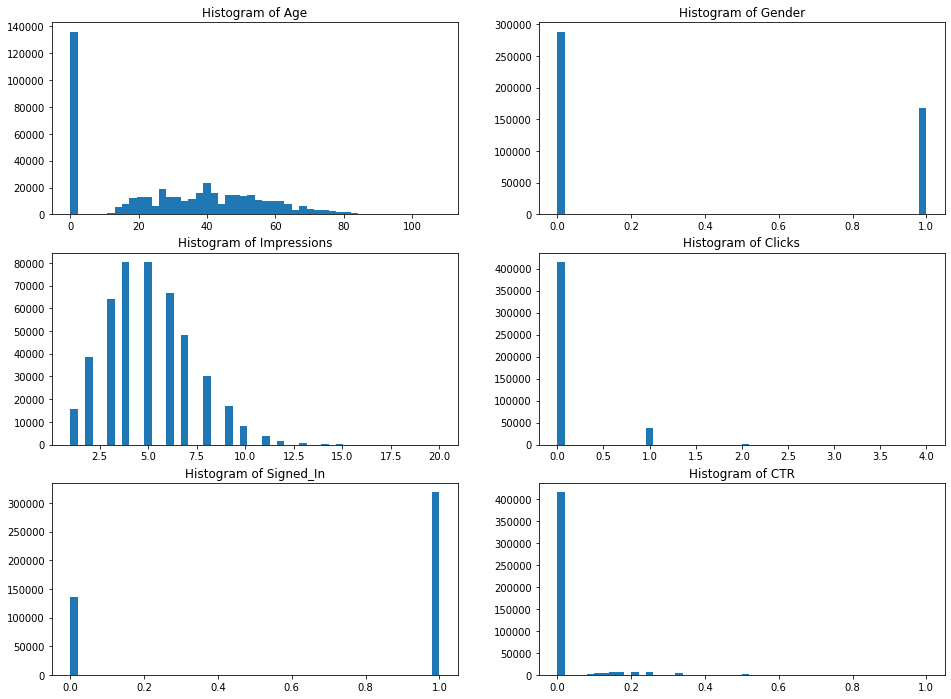

In [117]:
fig, ax = plt.subplots(3,2, figsize=(16,12))

for col, ax in zip(df_ctr.columns, ax.flatten()):
    
    ax.hist(df_ctr[col], bins= 50)
    ax.set_title('Histogram of '+ df_ctr[col].name)

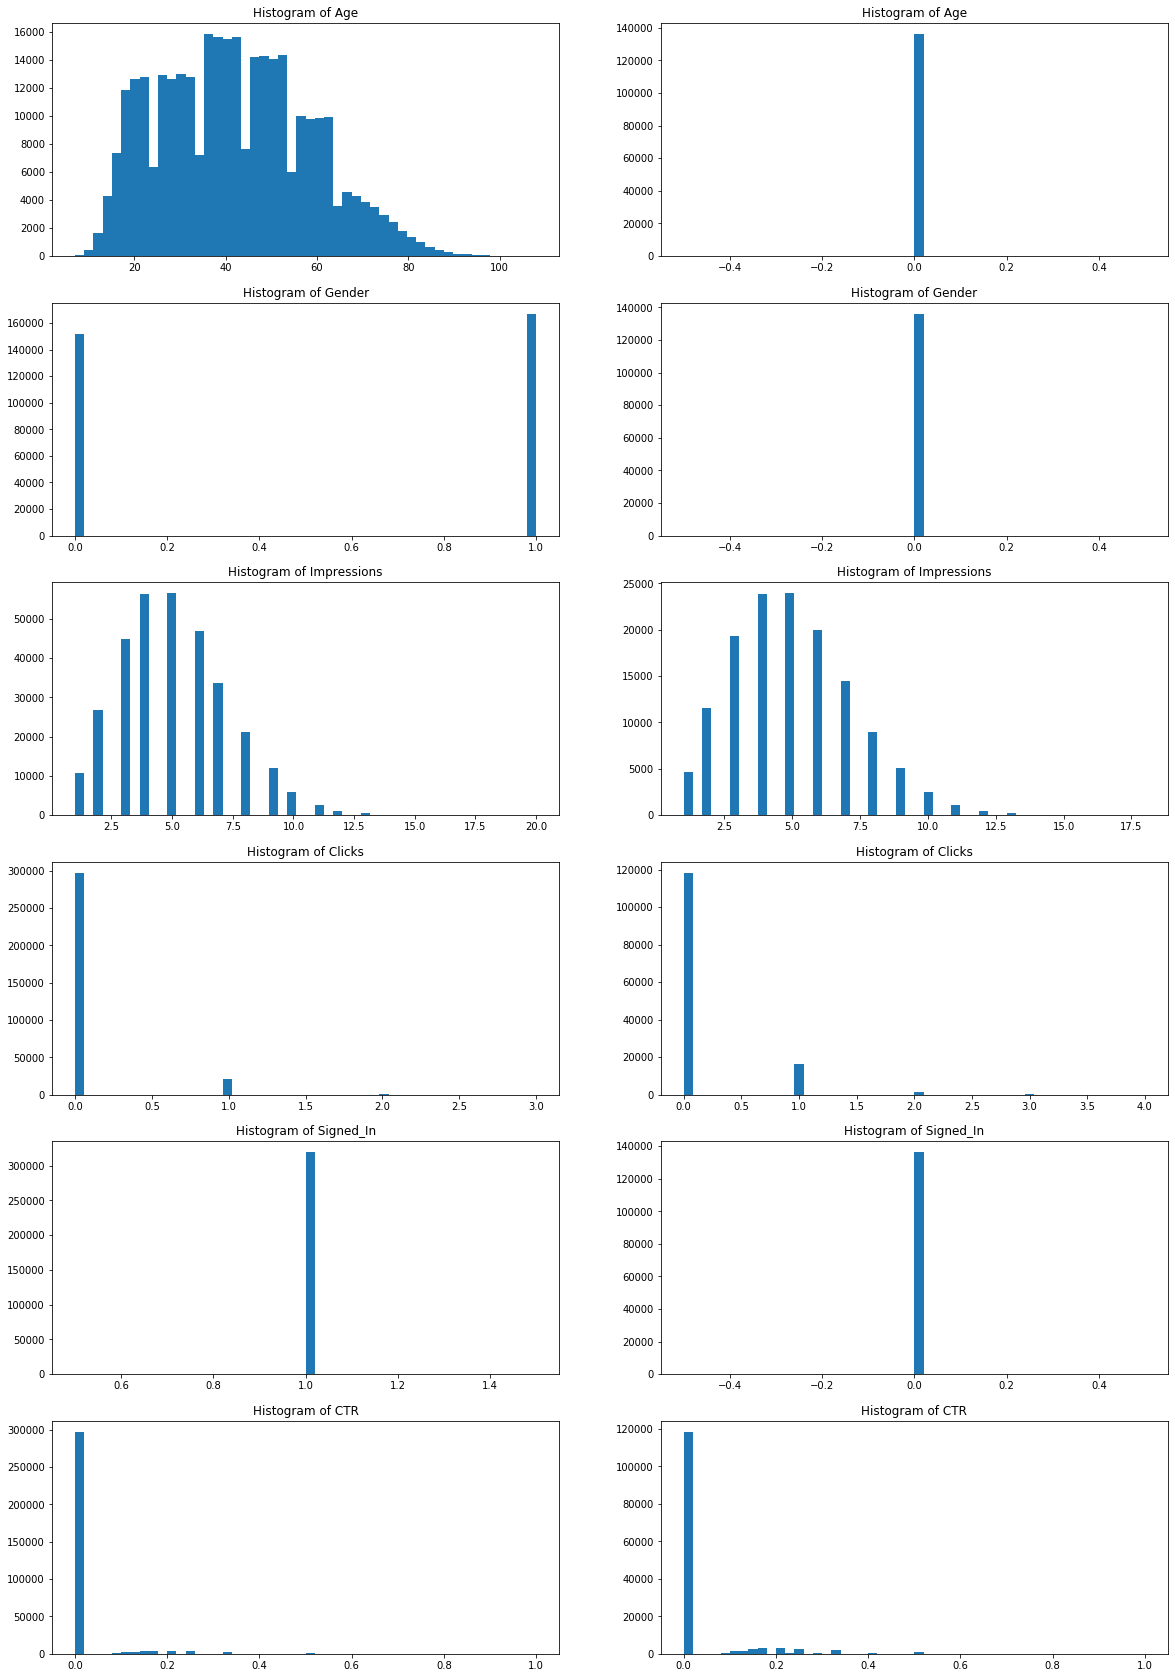

In [118]:
df_ctr_in = df_ctr[df_ctr['Signed_In']==1]
df_ctr_out = df_ctr[df_ctr['Signed_In']==0]

fig, ax = plt.subplots(6,2, figsize=(20,30))

col_names = np.repeat(df_ctr.columns,2)    

count = 0

for col, ax in zip(col_names,ax.flatten()):
    
    if count % 2 == 0:
        ax.hist(df_ctr_in[col], bins= 50)
        ax.set_title('Histogram of '+ col)
    
    else:
        
        ax.hist(df_ctr_out[col], bins= 50)
        ax.set_title('Histogram of '+ col)
    
    count += 1



In [172]:
res = stats.ttest_ind(df_ctr_in['CTR'], df_ctr_out['CTR'], equal_var=False)[1]
print('P value = ', round(res,10))

P value =  0.0


In [164]:
df_ctr_male = df_ctr_in[df_ctr_in['Gender'] == 1]
df_ctr_female = df_ctr_in[df_ctr_in['Gender'] == 0]

res = stats.ttest_ind(df_ctr_male['CTR'], df_ctr_female['CTR'], equal_var=False)[1]

print('P Value = ', round(res,4))

P Value =  0.001


In [127]:
bins = pd.IntervalIndex.from_tuples([(7,18),(18,24),(24,34),(34,44),(44,54),(54,64),(64,1000)])
df_ctr['Age_Group'] = pd.cut(df_ctr['Age'],bins).values

df_ctr_in = df_ctr[df_ctr['Signed_In'] == 1]

df_ctr_in.head()




,Age,Gender,Impressions,Clicks,Signed_In,CTR,Age_Group
0,36,0,3,0,1,0.0,"(34, 44]"
1,73,1,3,0,1,0.0,"(64, 1000]"
2,30,0,3,0,1,0.0,"(24, 34]"
3,49,1,3,0,1,0.0,"(44, 54]"
4,47,1,11,0,1,0.0,"(44, 54]"


In [159]:
results = pd.DataFrame(columns=['Age_Range','Mean_Diff','P_Value'])

for i in range(len(bins)):
    for j in range(len(bins)):
        
        test_data = df_ctr_in[df_ctr_in['Age_Group'] == bins[i]]
        
        if j > i:
            
            test2_data = df_ctr_in[df_ctr_in['Age_Group'] == bins[j]]
            
            result_dmean = test_data['CTR'].mean() - test2_data['CTR'].mean()
            result_t_test = stats.ttest_ind(test_data['CTR'], test2_data['CTR'], equal_var = False)[1]
            Age_Range_str = str(bins[i]) + ',' + str(bins[j])
            
            results = results.append({'Age_Range':Age_Range_str,'Mean_Diff':result_dmean,'P_Value':result_t_test}, ignore_index = True)
            
            

result_sig = result[result['P_Value'] >= 0.05].sort_values('Mean_Diff')
result_insig = result[result['P_Value'] <= 0.05].sort_values('Mean_Diff', ascending = True)

In [160]:
result_sig

,Age_Range,Mean_Diff,P_Value
7,"(18, 24],(34, 44]",-0.000566,0.087470
6,"(18, 24],(24, 34]",-0.000426,0.213658
8,"(18, 24],(44, 54]",-0.000237,0.477902
11,"(24, 34],(34, 44]",-0.000140,0.624662
12,"(24, 34],(44, 54]",0.000189,0.514689
15,"(34, 44],(44, 54]",0.000329,0.233928


From the previous table, it can be seen that the P values for the ranges (64, 1000], (54, 64] and (7, 18] are small. Therefore they don't appear in the table.

In [161]:
result_insig

,Age_Range,Mean_Diff,P_Value
10,"(18, 24],(64, 1000]",-0.020082,2.458627e-272
19,"(44, 54],(64, 1000]",-0.019845,1.430923e-295
14,"(24, 34],(64, 1000]",-0.019656,7.860398e-285
17,"(34, 44],(64, 1000]",-0.019516,5.245541e-288
9,"(18, 24],(54, 64]",-0.010586,1.007813e-130
18,"(44, 54],(54, 64]",-0.010349,2.525271e-151
13,"(24, 34],(54, 64]",-0.010160,5.668132e-141
16,"(34, 44],(54, 64]",-0.010020,7.523228e-144
20,"(54, 64],(64, 1000]",-0.009496,9.214903e-56
5,"(7, 18],(64, 1000]",-0.003218,3.563408e-05


The groups with the lowest difference between means are : (7, 18], (54, 64] and (64, 1000]. This makes sense since this age ranges are not quite the target customers for an online platform.

How much do you trust the stories you just told youself. Imagine that you observed the exact opposite situation than you actually did. Could you come up with a story to justify that?

I don't trust my story with a 100% confidence since I'm making assumptions. I would need more data from another sites to determine if this was actually true. Also, it'll be good to know the type of industry that it's related to the website, this would make the story more credible.

If the data was reversed and now the groups (7, 18], (54, 64] and (64, 1000] were statiscally significant, then I would say that this site relates to children's toys. Then the age ranges could be related to actual children and also grandparents that are buying gifts.

# Part 2: A / B Testing Landing Pages

1. Design an experiment in order to decide if the new page has a 1% lift in sign-up rate as compared to the old page? Describe in detail the data collection scheme you would use for the experiment. Justify why the data will be collected that way.

The experiment would consist of getting the CTR from the two landing pages. These two landing pages would be shown to the users randomly so the data it's IID. It's important that the reuslting dataset contains the day of the week, so it's possible to analyze the behavior of CTR during weekdays and weekends.

2. Why is it useful to report the change in conversion in terms of lift instead of absolute difference in conversion?

Because the lift it's closely related to the difference of the two groups mean CTR. Therefore if the differences in means between the two groups is larger to 0.1% (while statiscally significant) we can be sure that this change will represent at least a 1% lift.

3. State your null hypothesis and alternative hypothesis. Is your alternative hypothesis set up for a one-tailed or two-tailed test? Explain your choice.

The test should be two tailed, since we want to see if the difference between the 2 landing pages is positive or negative. In other words, keeping one landing page fixed, we want to see if a second landing page gets more or less CTR on average.

4. You ran a pilot experiment according to Question 1 for ~1 day (Tuesday). The collected data is in data/experiment.csv. Import the data into a pandas dataframe. Check the data for duplicates and clean the data as appropriate.

In [182]:
data = pd.read_csv('experiment.csv')

for col in data.columns:
    
    print(str(col), ': ', data[col].isna().any())


user_id :  False
ts :  False
ab :  False
landing_page :  False
converted :  False


In [183]:
for col in data.columns:
    
    print(str(col), ': ', data[col].unique())

user_id :  [4040615247 4365389205 4256174578 ... 9388248387 7696871995 4138279348]
ts :  [1.3569984e+09 1.3569984e+09 1.3569984e+09 ... 1.3570848e+09 1.3570848e+09
 1.3570848e+09]
ab :  ['treatment' 'control']
landing_page :  ['new_page' 'old_page']
converted :  [0 1]


In [193]:
print(len(data['user_id']))
print(len(data['user_id'].unique()))


191148
186388


In [197]:
np.sum(data.duplicated(subset='user_id'))
data_clean = data[data.duplicated(subset='user_id') == False]

data_clean.head()

,user_id,ts,ab,landing_page,converted
0,4040615247,1.356998e+09,treatment,new_page,0
1,4365389205,1.356998e+09,treatment,new_page,0
2,4256174578,1.356998e+09,treatment,new_page,0
3,8122359922,1.356998e+09,control,old_page,0
4,6077269891,1.356998e+09,control,old_page,0


In [255]:
data_clean_new = data_clean[data_clean['landing_page'] == 'new_page']
data_clean_old = data_clean[data_clean['landing_page'] == 'old_page']

data_clean_old['CTR']  = data_clean_old['converted']/len(data_clean_old)
data_clean_new['CTR']  = data_clean_new['converted']/len(data_clean_new)



/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


1.0528235164106532

In [264]:
from src.z_test import z_test

z_test(data_clean_old['CTR'].sum(), data_clean_new['CTR'].sum(), len(data_clean_old), len(data_clean_new) ,effect_size = 0.001, alpha=0.05)


(-0.6925144349016744, 0.7556928379774873, False)

The Z-test assumes that the data is normally distributed and that the variance is known.

The P value for this test is 0.75 therefore greater than 0.05. This means that we should accept the null hypothesis that the mean CTR of the two pages is 0. Therefore it's not recommended to use the new landing page.

7. Why might it be a problem if you keep evaluating the p-value as more data comes in and stop when the p-value is significant?

I'll next to be sure that the data is actually normally distributed and that the variance is actually known for both datasets.